In [ ]:
# 1. OR 데이터에 퍼셉트론 적용
from sklearn.linear_model import Perceptron 
import numpy as np

# 훈련 집합 구축 
X = np.array(([0,0],[0,1],[1,0],[1,1]))
y = np.array([-1,1,1,1])

#fit 함수로 Perceptron 학습
p = Perceptron()
p.fit(X,y)

print('학습된 퍼셉트론의 매개 변수: ', p.coef_, p.intercept_)
print('훈련집합에 대한 예측: ', p.predict(X))
print('정확률 측정: ', p.score(X,y)*100,'%')


학습된 퍼셉트론의 매개 변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [ ]:
# 2. 필기 숫자 데이터에 퍼셉트론 적용 
from sklearn import datasets 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()

x_train,x_test,y_train,y_test = train_test_split(digit.data, digit.target, train_size=0.6)

p=Perceptron(max_iter=100,eta0=0.01,verbose=0)
p.fit(x_train,y_train)

res=p.predict(x_test)

conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

no_correct=0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)

print('테스트 집합에 대한 정확률은 ',accuracy*100,'%입니다.')

[[83.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 58.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1. 70.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0. 61.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0. 71.  0.  0.  1.  1.  0.]
 [ 0.  2.  0.  2.  0. 83.  1.  2.  5.  4.]
 [ 0.  0.  0.  0.  0.  0. 67.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0. 65.  0.  0.]
 [ 0.  3.  0.  1.  1.  0.  1.  1. 63.  3.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0. 61.]]
테스트 집합에 대한 정확률은  94.85396383866481 %입니다.


In [ ]:
# 3. sklearn 필기 숫자 데이터에 다층 퍼셉트론 적용
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()

x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,train_size=0.6)

mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res = mlp.predict(x_test)

conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('테스트 집합에 대한 정확률은 ',accuracy*100,'%입니다.')


Iteration 1, loss = 2.58423192
Iteration 2, loss = 0.37408691
Iteration 3, loss = 0.23964905
Iteration 4, loss = 0.17583410
Iteration 5, loss = 0.14966904
Iteration 6, loss = 0.11642517
Iteration 7, loss = 0.10684801
Iteration 8, loss = 0.09116210
Iteration 9, loss = 0.08341451
Iteration 10, loss = 0.07328557
Iteration 11, loss = 0.06806730
Iteration 12, loss = 0.06171108
Iteration 13, loss = 0.05586829
Iteration 14, loss = 0.05232104
Iteration 15, loss = 0.04804705
Iteration 16, loss = 0.04331176
Iteration 17, loss = 0.04108193
Iteration 18, loss = 0.03837067
Iteration 19, loss = 0.03690977
Iteration 20, loss = 0.03403286
Iteration 21, loss = 0.03334002
Iteration 22, loss = 0.03104714
Iteration 23, loss = 0.02984123
Iteration 24, loss = 0.02812195
Iteration 25, loss = 0.02640596
Iteration 26, loss = 0.02610140
Iteration 27, loss = 0.02430189
Iteration 28, loss = 0.02357023
Iteration 29, loss = 0.02255602
Iteration 30, loss = 0.02184585
Iteration 31, loss = 0.02079326
Iteration 32, los

In [ ]:
# 4. MNIST 데이터셋을 다층 퍼셉트론으로 인식
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import numpy as np 

mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0
x_train = mnist.data[:60000]
x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])

mlp = MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test)

conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('테스트 집합에 대한 정확률은 ',accuracy*100,'%입니다.')

Iteration 1, loss = 0.62394934
Iteration 2, loss = 0.26688996
Iteration 3, loss = 0.21081455
Iteration 4, loss = 0.17576815
Iteration 5, loss = 0.15100691
Iteration 6, loss = 0.13121780
Iteration 7, loss = 0.11549393
Iteration 8, loss = 0.10391047
Iteration 9, loss = 0.09297150
Iteration 10, loss = 0.08397992
Iteration 11, loss = 0.07653929
Iteration 12, loss = 0.07058578
Iteration 13, loss = 0.06461394
Iteration 14, loss = 0.05926895
Iteration 15, loss = 0.05511140
Iteration 16, loss = 0.05114206
Iteration 17, loss = 0.04753477
Iteration 18, loss = 0.04448543
Iteration 19, loss = 0.04084360
Iteration 20, loss = 0.03812169
Iteration 21, loss = 0.03505086
Iteration 22, loss = 0.03229304
Iteration 23, loss = 0.03099570
Iteration 24, loss = 0.02832467
Iteration 25, loss = 0.02685758
Iteration 26, loss = 0.02461970
Iteration 27, loss = 0.02268222
Iteration 28, loss = 0.02113601
Iteration 29, loss = 0.01992604
Iteration 30, loss = 0.01931293
Iteration 31, loss = 0.01717855
Iteration 32, los

하이퍼 매개변수 최적화에 걸린 시간은  482.0268626213074 초입니다.


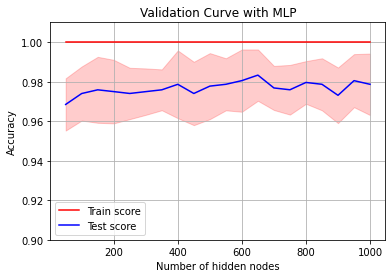


최적의 은닉층의 노드 갯수는  650 개입니다.

[[82.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 66.  5.  0.  0.  0.  1.  0.  3.  0.]
 [ 0.  0. 64.  0.  0.  1.  0.  0.  2.  0.]
 [ 0.  0.  0. 76.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0. 68.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0. 67.  1.  0.  4.  2.]
 [ 0.  0.  0.  0.  0.  1. 74.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 59.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0. 65.  2.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0. 66.]]
테스트 집합에 대한 정확률은  95.54937413073714 %입니다.


In [ ]:
# 5. validation_curve 함수로 최적의 은닉 노드 갯수 찾기 
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve
import numpy as np 
import matplotlib.pyplot as plt
import time 

digit=datasets.load_digits()
x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,train_size=0.6)

start = time.time()
mlp = MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
train_score,test_score = validation_curve(mlp,x_train,y_train,param_name='hidden_layer_sizes',param_range=prange,cv=10,scoring='accuracy',n_jobs=4)
end = time.time()
print('하이퍼 매개변수 최적화에 걸린 시간은 ',end - start,'초입니다.')

train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.plot(prange,train_mean, label='Train score',color='r')
plt.plot(prange,test_mean, label='Test score',color='b')
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color='r')
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color='r')
plt.legend(loc='best')
plt.title('Validation Curve with MLP')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Accuracy')
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes = prange[np.argmax(test_mean)]
print('\n최적의 은닉층의 노드 갯수는 ',best_number_nodes,'개입니다.\n')
mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

res=mlp_test.predict(x_test)

conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('테스트 집합에 대한 정확률은 ',accuracy*100,'%입니다.')

In [ ]:
# 연습문제 1 헤브(hebb)의 학습 규칙을 조사하여 제시하시오
# 양쪽의 뉴런이 동시에 또 반복적으로 활성화 되었다면 
# 그 두 뉴런 사이의 연결 강도가 강화된다는 학습 규칙 
# 두 뉴런을 각각 i,j라 했을때 이 둘의 연결 강도(w_ij) 식으로 나타낸다면 
# => w_ij(t+1) = w_ij(t) + n * y_j(t) * x_i(t)
# 이때 x_i와 y_j는 두 뉴런의 출력이고 
# n은 두 뉴런 사이의 학습률이다 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, scatter_size=500):
    
    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'o', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(X[:,0].min()-0.1, X[:,0].max()+0.1)
    plt.ylim(X[:,1].min()-0.1, X[:,1].max()+0.1)
    
    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black',
                    s=scatter_size,)
        

학습전 제시된 데이터


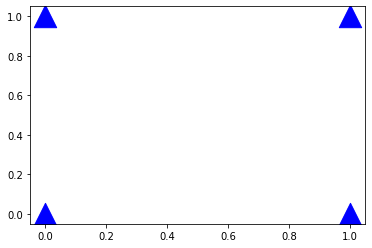

학습 후 분류 한 데이터


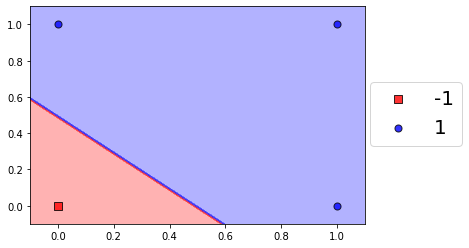

학습된 퍼셉트론의 매개 변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [ ]:
# 연습문제 2 [그림 4-3]에서 샘플 4개에 대해 제대로 인식하는지 확인하시오.

from sklearn.linear_model import Perceptron 
import numpy as np
import matplotlib.pyplot as plt 

# 훈련 집합 구축 
X = np.array(([0,0],[0,1],[1,0],[1,1]))
Y = np.array([-1,1,1,1])

X_class = {
    -1: np.array([x for x,y in zip(X,Y) if y == -1]),
     1: np.array([x for x,y in zip(X,Y) if y == 1])
}

#fit 함수로 Perceptron 학습
p = Perceptron()
p.fit(X,Y)

print('학습전 제시된 데이터')
plt.scatter(X[...,0],X[...,1],marker='^',c='b',s=500)
plt.show()

print('학습 후 분류 한 데이터')
plot_decision_regions( X=X, y=Y, classifier=p, scatter_size=50)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend(bbox_to_anchor=(1.32,0.7),fontsize = 20)
plt.show()

print('학습된 퍼셉트론의 매개 변수: ', p.coef_, p.intercept_)
print('훈련집합에 대한 예측: ', p.predict(X))
print('정확률 측정: ', p.score(X,Y)*100,'%')

학습전 제시된 데이터


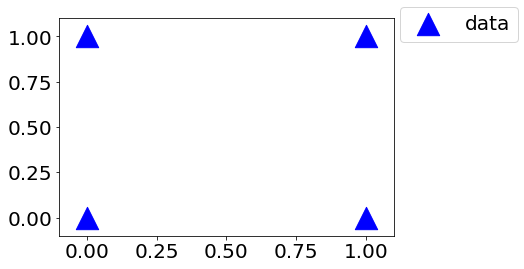

학습 후 분류 한 데이터


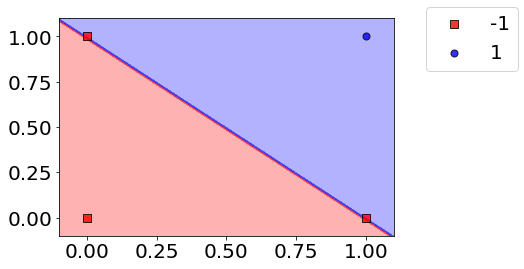

[-2.  2.  2.]


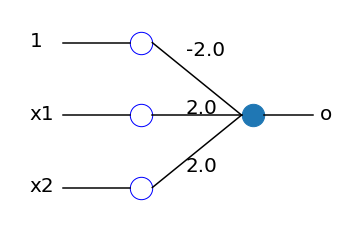

학습된 퍼셉트론의 매개 변수:  [[2. 2.]] [-2.]
훈련집합에 대한 예측:  [-1 -1 -1  1]
정확률 측정:  100.0 %


In [ ]:
# 연습문제 3 [그림 4-3(a)]의 데이터에서 레이블을 y1=-1, y2=-1, y3=-1, y4=1로 설정하면 AND문제가 된다.
# AND 데이터를 [그림 4-3(a)]처럼 그리고 AND데이터를 분류하는 퍼셉트론을 [그림 4-3(b)]처럼 제시하시오.
from sklearn.linear_model import Perceptron 
import numpy as np
import matplotlib.pyplot as plt 

# 훈련 집합 구축 
X = np.array(([0,0],[0,1],[1,0],[1,1]))
Y = np.array([-1,-1,-1,1])

#fit 함수로 Perceptron 학습
p = Perceptron()
p.fit(X,Y)

print('학습전 제시된 데이터')
plt.scatter(X[...,0],X[...,1],marker='^',c='b',s=500,label='data')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend(bbox_to_anchor=(1.4,1.1),fontsize = 20)
plt.show()

print('학습 후 분류 한 데이터')
plot_decision_regions( X=X, y=Y, classifier=p, scatter_size=50)
plt.legend(bbox_to_anchor=(1.4,1.1),fontsize = 20)
plt.show()

plt.rcParams['font.size'] = 20
node_gap = 0.4
for i in range(3):
  plt.plot([0.55,0.95],[0.1+i*node_gap,0.5],c='black')  
  plt.plot([0.15,0.45],[0.1+i*node_gap,0.1+i*node_gap],c='black')

input_text = ['1','x1','x2']
for idx, text in enumerate(reversed(input_text)):
  plt.text(0.0,0.08+idx*node_gap,text)

weight=np.hstack([p.intercept_, p.coef_[0]])
print(weight)
for idx, w in enumerate(reversed(weight)):
  plt.text(0.7,0.19+idx*node_gap*4/5,str(w))

plt.scatter([0.5,0.5,0.5],[0.1,0.5,0.9],c='white',edgecolor='blue',s=500)
plt.scatter([1.0],[0.5], s=500)
plt.plot([1.05,1.27],[0.5,0.5],c='black')
plt.text(1.3,0.48,'o')

plt.xlim(-0.1,1.4)
plt.ylim(-0.1,1.1)
plt.axis(False)
plt.show()


print('학습된 퍼셉트론의 매개 변수: ', p.coef_, p.intercept_)
print('훈련집합에 대한 예측: ', p.predict(X))
print('정확률 측정: ', p.score(X,Y)*100,'%')

In [ ]:
# 연습문제 4 [알고리즘 4-4]를 세대 수 E를 넘으면 멈추도록 확장하시오.

#[알고리즘 4-4] 퍼셉트론 학습 
#입력 : 훈련 집합 (n은 샘플의 개수)
#출력 : 최적의 매개 변수 µ

#01. 난수로 매개변수 벡터 w를 초기화한다. #w는 퍼셉트론 가중치 
#02. for i=1 to i!=E # E는 세대 수
#03.   I=[]  # 공집합
#04.   for j=1 to n 
#05.     o=activation_function(w * x.T) # 식 (4.4)를 적용해 인식수행 
#06.     if(o!=y)I.append(x)   # 틀린 샘플을 I에 추가 
#07.   if(I==ø): break     # 모든 샘플을 맞히면 (손실 함수가 0) 루프를 빠져 나감
#08.   w+=p∑yx  # 식 (4.10)을 적용해 매개변수 갱신 
#09. µ=w 


In [ ]:
# 연습문제 5 검출로는 해결할 수 없고 분할로 해결할 수 있는 응용을 두 가지 제시하시오.
# 1. 사진에서 특정 물체를 삭제하는 알고리즘 
# 2. 특정 물체의 길이 측정 

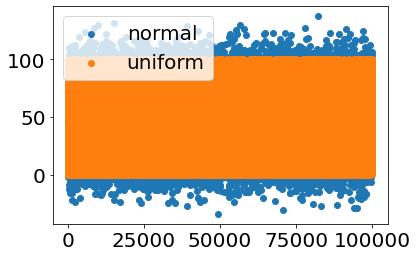

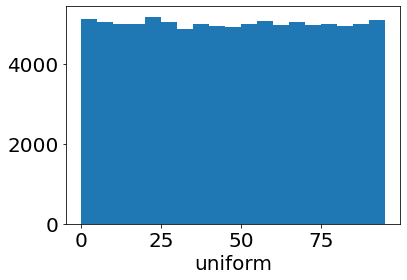

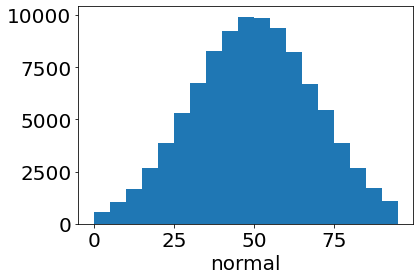

uniform에서 100이상의 랜덤값 []
uniform에서 최솟값 :  0.0010369382176134145 
	최댓값 99.99902844571345
uniform의 평균 :  49.92191134015858 
	분산 :  837.302257952874 
	표준편차 :  28.93617559306817
normal에서 100+-1이상인 값들 [68.14396081452938, 17.155643171085146, 42.94821257727338, 33.12029735622684, 66.38464533314308, 64.25321475573207, 43.472882245705485, 56.12377783379517, 20.852731822203147, 49.61616205961126, 39.474147454938645, 67.15921223108052, 40.67985018178034, 46.05274723775136, 93.66309617349889, 59.386755197488796, 46.98893579445963, 55.02829828203162, 45.87142103814945, 48.971076685384986, 54.883983848100755, 59.7180660912793, 67.34536357299586, 75.23432357178748, 38.07907596805305, 51.70230589399965, 27.748274354435235, 21.050910934421687, -1.5251312972393407, 42.927284766074166, 41.50888499152042, 52.128889620442315, 59.333355801165794, 7.64455951017289, 58.8729908664092, 83.17643640791243, 58.0359940715248, 39.477585007289946, 66.16514142759632, 60.534944243199604, 79.06343094504842, 62.8608643147

In [ ]:
# 연습문제 6 스토케스틱 알고리즘은 난수를 사용해 무작위로 결정하는 단계를 포함하는 알고리즘이다.
# numpy 라이브러리에서 제공하는 난수를 생성하는 대표적인 함수인 
# random.uniform과 random.normal이 어떻게 다른지 설명하시오.
import matplotlib.pyplot as plt
import numpy as np 

np.random.seed(1)

n = 100000

uniform = np.random.uniform(low = 0,high=100,size=n)

normal = np.random.normal(loc=50,scale=20,size=n)

plt.scatter(np.arange(n),normal,label='normal')
plt.scatter(np.arange(n),uniform,label='uniform')
plt.legend()
plt.show()

plt.hist(uniform,bins=np.arange(0,100,5))
plt.xlabel('uniform')
plt.show()

plt.hist(normal,bins=np.arange(0,100,5))
plt.xlabel('normal')
plt.show()

def isBiggerThan100(x):return x>100

print('uniform에서 100이상의 랜덤값',list(filter(lambda x: x>100,uniform)))
print('uniform에서 최솟값 : ',np.array(uniform).min(),'\n\t최댓값',np.array(uniform).max())
print('uniform의 평균 : ',np.mean(uniform),'\n\t분산 : ',np.var(uniform),'\n\t표준편차 : ',np.std(uniform))

print('normal에서 100+-1이상인 값들',list(filter(lambda x: x>101 or x<99,normal)))
print('normal에서 100이상의 랜덤값',list(filter(lambda x: x>100,normal)))
print('normal에서 최솟값 : ',np.array(normal).min(),'\n\t최댓값',np.array(normal).max())
print('normal의 평균 : ',np.mean(normal),'\n\t분산 : ',np.var(normal),'\n\t표준편차 : ',np.std(normal))

# 결론 | uniform은 함수의 high low 값 내에서 균등 분배 되지만
#       normal는 함수의 loc값에서 scale만큼의 표준편차를 가진 정규분포로 값을 추출한다
#       normal은 min max 값을 컨트롤 하지 못한다


[array([1. , 1. , 1. , 1. , 1. , 1.2, 1.2, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4,
       1.4, 1.4, 1.6, 1.6, 1.6, 1.6, 1.6, 1.8, 1.8, 1.8, 1.8, 1.8, 1. ,
       1. , 1. , 1. , 1. , 1.2, 1.2, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4, 1.4,
       1.4, 1.6, 1.6, 1.6, 1.6, 1.6, 1.8, 1.8, 1.8, 1.8, 1.8, 1. , 1. ,
       1. , 1. , 1. , 1.2, 1.2, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4, 1.4, 1.4,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.8, 1.8, 1.8, 1.8, 1.8, 1. , 1. , 1. ,
       1. , 1. , 1.2, 1.2, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4, 1.4, 1.4, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.8, 1.8, 1.8, 1.8, 1.8, 1. , 1. , 1. , 1. ,
       1. , 1.2, 1.2, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4, 1.4, 1.4, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.8, 1.8, 1.8, 1.8, 1.8]), array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo






=============== 1 번째 퍼셉트론===============
max_iter :  1 eta0 :  1.0 verbose :  0
예측결과 혼동 행렬
 [[60.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 42.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0. 62.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. 68.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. 71.  1.  0.  1.  1.  0.]
 [ 1.  0.  0.  0.  0. 68.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  1. 67.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 74.  0.  0.]
 [ 1. 23.  3.  8.  1.  3.  2.  2. 74. 11.]
 [ 0.  2.  0.  1.  0.  3.  0.  0.  0. 60.]]
테스트 집합에 대한 정확률은  89.84700973574408 %입니다.





=============== 2 번째 퍼셉트론===============
max_iter :  1 eta0 :  1.0 verbose :  2
예측결과 혼동 행렬
 [[60.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 42.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0. 62.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. 68.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. 71.  1.  0.  1.  1.  0.]
 [ 1.  0.  0.  0.  0. 68.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  1. 67.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 74.

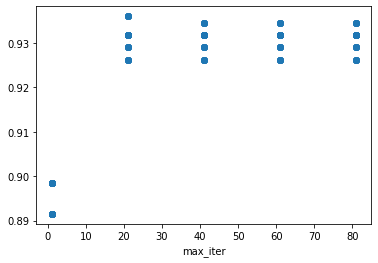

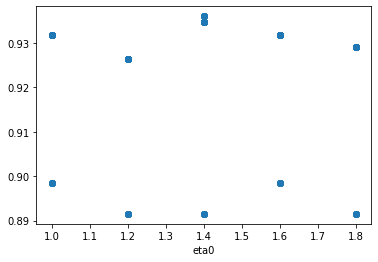

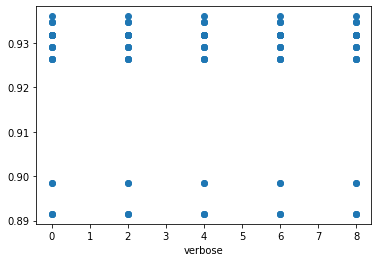

In [ ]:
# 연습문제 7 [프로그램 4-2]에 있는 Perceptron 함수의 매개변수 max_iter, eta0, verbose에 대해 조사 하시오.
# 그리고 매개 변수 값을 서로 다른 조합으로 바꿔가면서 실험 하시오

from sklearn import datasets 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px 
import numpy as np

digit = datasets.load_digits()
x_train,x_test,y_train,y_test = train_test_split(digit.data, digit.target, train_size=0.6)

max_iter_list = np.arange(1,101,20)
eta0_list = np.arange(1,2,0.2)
verbose_list = np.arange(0,10,2)

max_iter = 1
eta0 = 0
verbose = 2

param_list = np.meshgrid(eta0_list,max_iter_list,verbose_list)
param_list = [np.ravel(param) for param in param_list]

# fig = px.scatter_3d(param_list,
#     x=param_list[eta0],
#     y=param_list[max_iter],
#     z=param_list[verbose],)

# fig.show()

print(param_list)

perceptron_list = [Perceptron(max_iter=max_iter, eta0=eta0,verbose=False) for (eta0,max_iter,verbose) in zip (param_list[eta0],param_list[max_iter],param_list[verbose])]
for p in perceptron_list: p.fit(x_train,y_train)
predict_list = [p.predict(x_test) for p in perceptron_list]

confuse_matrix_list = []
for res in predict_list:
  conf = np.zeros((10,10))
  for i in range(len(res)): conf[res[i]][y_test[i]]+=1
  confuse_matrix_list.append(conf)

accuracy_list = []
for j in range(len(predict_list)):
  no_correct=0
  for i in range(10): no_correct+=confuse_matrix_list[j][i][i]
  accuracy_list.append(no_correct/len(predict_list[j]))
  
for i in range(len(perceptron_list)):
  print('\n\n\n\n\n===============',i+1,'번째 퍼셉트론===============')
  print('max_iter : ',param_list[max_iter][i],'eta0 : ',param_list[eta0][i],'verbose : ',param_list[verbose][i])
  print('예측결과 혼동 행렬\n', confuse_matrix_list[i])
  print('테스트 집합에 대한 정확률은 ',accuracy_list[i]*100,'%입니다.')

plt.scatter(param_list[max_iter],accuracy_list)
plt.xlabel("max_iter")
plt.show()

plt.scatter(param_list[eta0],accuracy_list)
plt.xlabel("eta0")
plt.show()

plt.scatter(param_list[verbose],accuracy_list)
plt.xlabel("verbose")
plt.show()

# max_iter은 훈련 데이터셋을 반복할 횟수를 정의합니다.
# eta0는 업데이트시 곱해지는 상수입니다.
# verbose는 학습 시키는 과정에서 얼마나 자세히 과정을 logging할것인가 선택하는 옵션으로 bool type의 옵션이다.

In [ ]:
# 연습문제 8 [프로그램 4-2]처럼 [프로그램 4-1]에 디자인 패턴을 표시하시오.
from sklearn.linear_model import Perceptron 
import numpy as np

# 훈련 집합 구축 
X = np.array(([0,0],[0,1],[1,0],[1,1]))
y = np.array([-1,1,1,1])

#fit 함수로 Perceptron 학습
p = Perceptron()
p.fit(X,y)

print('학습된 퍼셉트론의 매개 변수: ', p.coef_, p.intercept_)
print('훈련집합에 대한 예측: ', p.predict(X))
print('정확률 측정: ', p.score(X,y)*100,'%')

학습된 퍼셉트론의 매개 변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [ ]:
# 연습문제 9 [프로그램4-2]처럼 3장에 있는 [프로그램 3-5] 디자인 패턴을 표시하시오.
# 5. 필기 숫자 인식 - 훈연 집합으로 학습하고 테스트 집합으로 성능 측정 
from sklearn import datasets 
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np 

# datasets을 읽고 훈연 집합과 테스트 집합으로 분할
difit=datasets.load_digits() # 데이터 읽기
x_train,x_test,y_train,y_test = train_test_split(digit.data, digit.target, train_size=0.6) # 데이터를 학습데이터와 테스트 데이터로 분류

# svm의 분류 모델 SVC를 학습
s=svm.SVC(gamma=0.001) # 모델 생성 
s.fit(x_train, y_train) # 모델에 학습데이터 입력하여 학습 진행 

res=s.predict(x_test) # 모델에 테스트 데이터 입력하여 분류 결과 값 저장


# 혼동 행렬 구함 
conf = np.zeros((10,10))  # 10x10 0행열 
for i in range(len(res)):   # 혼동행열 만들기 
  conf[res[i]][y_test[i]]+=1  
  #if(i < 50):print(conf)
print(conf)

# 정확률 측정하고 출력
no_correct = 0
for i in range(10): no_correct+=conf[i][i]
accuracy = no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy * 100, "%입니다.")

In [ ]:
# 연습문제 10 [프로그램 4-2]의 퍼셉트론 모델 p는 출력 노드가 10개 이므로 [그램 4-2(a)]의 표준 퍼셉트론을 확장한 버전이다.
# p의 구조를 그리시오.

from sklearn import datasets 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()

x_train,x_test,y_train,y_test = train_test_split(digit.data, digit.target, train_size=0.6)

p=Perceptron(max_iter=100,eta0=0.01,verbose=0)
p.fit(x_train,y_train)

res=p.predict(x_test)

conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

no_correct=0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)

print('학습된 퍼셉트론의 매개 변수: ', p.coef_, p.intercept_)
print('테스트 집합에 대한 정확률은 ',accuracy*100,'%입니다.')

[[69.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 68.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0. 77.  4.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0. 64.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0. 68.  0.  1.  0.  0.  0.]
 [ 2.  3.  0.  9.  0. 66.  2.  4.  2.  6.]
 [ 0.  0.  0.  0.  0.  0. 73.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 67.  0.  1.]
 [ 0.  5.  0.  0.  2.  0.  0.  1. 54.  3.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0. 60.]]
학습된 퍼셉트론의 매개 변수:  [[ 0.00000000e+00 -1.20000000e-01 -4.20000000e-01  1.50000000e-01
  -4.30000000e-01 -1.17000000e+00 -4.60000000e-01  0.00000000e+00
   0.00000000e+00 -3.50000000e-01  1.00000000e-02  5.90000000e-01
   3.80000000e-01  3.10000000e-01 -2.00000000e-02  0.00000000e+00
   0.00000000e+00 -4.00000000e-02  2.50000000e-01 -1.50000000e-01
  -8.70000000e-01  1.13000000e+00  3.90000000e-01  0.00000000e+00
   0.00000000e+00 -2.00000000e-02 -8.00000000e-02 -1.05000000e+00
  -1.87000000e+00  4.00000000e-01  3.50000000e-01  0.00000000e+00
   0.00000000e+00  3.60

In [ ]:
# 연습문제 11 [그림 4-12(b]에 있는 퍼셉트론 3의 가중치가 (-1.0,1.0,1.0)에서 (-0.9,0.9,0.8)로 바뀌었다고 가정하자.
# 새로운 다층퍼셉트론에 대해 [예제 4-3]을 수행하시오.


In [ ]:
# 연습문제 12 [그림 4-12(b)]의 다층 퍼셉트론에서 u211,u121,u122는 얼마인지 적으시오.


In [ ]:
# 연습문제 13 [프로그램 4-4]의 13행은 은닉층의 노드 개수로 100을 사용한다. 
# 은닉층의 개수를 200으로수늘려 성능을 측정하고 둘의 성능을 비교하시오.

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import numpy as np 

mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0
x_train = mnist.data[:60000]
x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])
for i in range(100,201,100):
  print('hidden layer size = ',i)
  mlp = MLPClassifier(hidden_layer_sizes=(i),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=False)
  mlp.fit(x_train,y_train)

  res=mlp.predict(x_test)

  conf = np.zeros((10,10))
  for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
  print(conf)

  no_correct = 0
  for i in range(10):
    no_correct += conf[i][i]
  accuracy = no_correct/len(res)
  print('테스트 집합에 대한 정확률은 ',accuracy*100,'%입니다.')

hidden layer size =  100
[[9.720e+02 0.000e+00 6.000e+00 0.000e+00 1.000e+00 3.000e+00 5.000e+00
  1.000e+00 5.000e+00 3.000e+00]
 [0.000e+00 1.125e+03 3.000e+00 0.000e+00 1.000e+00 0.000e+00 2.000e+00
  4.000e+00 0.000e+00 3.000e+00]
 [1.000e+00 2.000e+00 1.000e+03 5.000e+00 3.000e+00 0.000e+00 1.000e+00
  8.000e+00 3.000e+00 0.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 9.890e+02 2.000e+00 1.000e+01 1.000e+00
  3.000e+00 7.000e+00 4.000e+00]
 [0.000e+00 0.000e+00 2.000e+00 1.000e+00 9.590e+02 1.000e+00 2.000e+00
  2.000e+00 5.000e+00 8.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 3.000e+00 0.000e+00 8.640e+02 5.000e+00
  0.000e+00 4.000e+00 4.000e+00]
 [3.000e+00 2.000e+00 4.000e+00 0.000e+00 3.000e+00 5.000e+00 9.400e+02
  0.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 5.000e+00 3.000e+00 3.000e+00 2.000e+00 0.000e+00
  1.003e+03 4.000e+00 3.000e+00]
 [2.000e+00 2.000e+00 7.000e+00 6.000e+00 1.000e+00 5.000e+00 2.000e+00
  1.000e+00 9.380e+02 3.000e+00]
 [0.000e+00 0.000e+00 1.000e+0

In [ ]:
# 연습문제 14 MLPClassifier 함수에서 shuffle 매개 변수의 역할을 설명하시오.
# 반복 학습시 마다 샘플을 섞을지 여부입니다. (bool type)

In [ ]:
# 연습문제 15 [프로그램 4-5]를 MNIST에 적용하시오.

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt 
import numpy as np 
import time 

mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0
x_train = mnist.data[:60000]
x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])

start = time.time()
mlp = MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
train_score,test_score = validation_curve(mlp,x_train,y_train,param_name='hidden_layer_sizes',param_range=prange,cv=10,scoring='accuracy',n_jobs=4)
end = time.time()
print('하이퍼 매개변수 최적화에 걸린 시간은 ',end - start,'초입니다.')

train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.plot(prange,train_mean, label='Train score',color='r')
plt.plot(prange,test_mean, label='Test score',color='b')
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color='r')
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color='r')
plt.legend(loc='best')
plt.title('Validation Curve with MLP')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Accuracy')
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes = prange[np.argmax(test_mean)]
print('\n최적의 은닉층의 노드 갯수는 ',best_number_nodes,'개입니다.\n')
mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

res=mlp_test.predict(x_test)

conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('테스트 집합에 대한 정확률은 ',accuracy*100,'%입니다.')

In [ ]:
# 연습문제 16[그림 4-13]은 은닉층이 하나인 다층 퍼셉트론이다.
# 은닉층이 2개인 다층 퍼셉트론을 그리고 식 (4.11), 식(4.12), 식(4.13), 식(4.14), 식(4.16)을 새로운 다층퍼셉트론을 위한 식으로 확장하시오.

step function


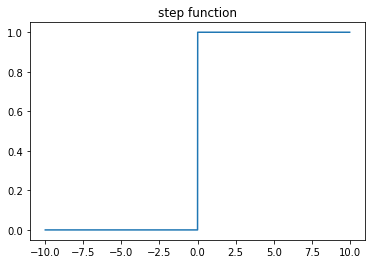

sigmoid function


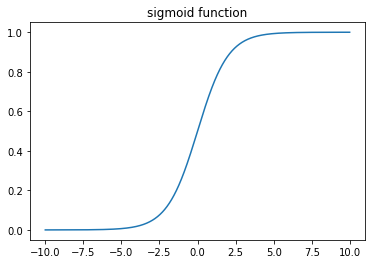

하이퍼볼릭 탄젠트 시그모이드(tahn function)


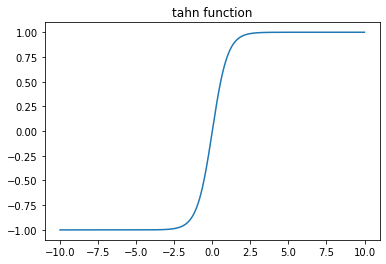

soft max function


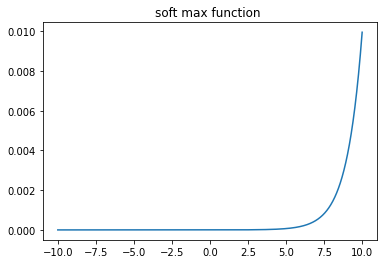

soft plus function


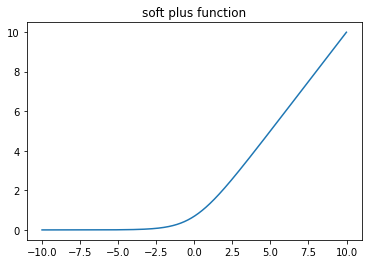

ReLU function


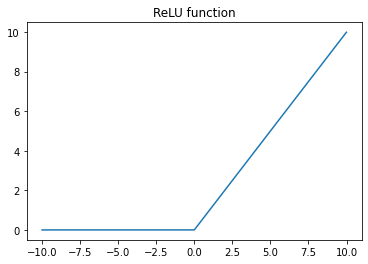

In [ ]:
# 연습문제 17 [그림 4-14]엥 있는 활성 함수를 그리는 파이썬 프로그램을 작성하시오.
import numpy as np 
import matplotlib.pyplot as plt   

x = np.arange(-10, 10, 0.01)         

print('step function')
def stepfunc(x): return np.where(x<=0,0,1)
plt.plot(x, stepfunc(x))
plt.title('step function')
plt.show()

print('sigmoid function')
def sigmoid(x): return 1/(1 + np.exp(-x))
plt.plot(x, sigmoid(x))
plt.title('sigmoid function')
plt.show()

print('하이퍼볼릭 탄젠트 시그모이드(tahn function)')
def tanh(x): return(np.exp(x) - np.exp(-x))/(np.exp(x)+np.exp(-x))
plt.plot(x,tanh(x))
plt.title('tahn function')
plt.show()

print('soft max function')
def softmax(x):return np.exp(x) / np.sum(np.exp(x))
result = softmax(x)
plt.plot(x,softmax(x))
plt.title('soft max function ')
plt.show()

print('soft plus function')
def softplus(x): return np.log(1+np.exp(x))
plt.plot(x,softplus(x))
plt.title('soft plus function')
plt.show()


print('ReLU function')
def relu(x): return np.maximum(0,x)
plt.plot(x,relu(x))
plt.title('ReLU function')
plt.show()

In [ ]:
# 연습문제 18 [프로그램 4-4]는 은닉층이 하나인 다층 퍼셉트론을 사용한다.
# 은닉층이 2,3,4,5개로 점점 늘려 깊게 만들면서 성능 변화를 측정하고 
# 이렇게 깊어지면 성능 향상이 있는지 확인하시오.
# 실험은 MNIST 데이터를 사용하시오.

# 4. MNIST 데이터셋을 다층 퍼셉트론으로 인식
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import numpy as np 
import time 
from pprint import pprint


mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0
x_train = mnist.data[:60000]
x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])

mlp_list = [MLPClassifier(hidden_layer_sizes=tuple(map(int,np.ones(i)*100)),
                          learning_rate_init=0.001,
                          batch_size=512,
                          max_iter=300,
                          solver='adam',
                          verbose=True)
                          for i in range(1,6)]

train_time=[]
for mlp in mlp_list: 
  start = time.time()
  mlp.fit(x_train,y_train)
  train_time.append(time.time()-start)

predict_list=[mlp.predict(x_test) for mlp in mlp_list]


confuse_matrix_list = np.zeros((5,10,10))

for confuse,res in zip(confuse_matrix_list,predict_list):
  for x,y in zip(res,y_test):
    confuse[x][y]+=1

no_correct_list = [sum(sum(confuse*np.identity(10))) for confuse in confuse_matrix_list]
accuracy_list = [no_correct/len(res) for no_correct,res in zip(no_correct_list,predict_list)]
for idx,accuracy in enumerate(accuracy_list): print(idx, '번째 테스트 집합에 대한 정확률은 ',accuracy*100,'%입니다.\n 학습 시간은 ',train_time[idx],'입니다.')

# 첫번째 학습 당시 학습 되풀이 횟수 87,63,45,42, 39

# 은닉층이 많로수록 되풀이 횟수는 줄지만 
# 일정 이상의 은닉층의 갯수를 넘어가면 
# 오히려 시간은 늘어나고 
# 정확도도 다소 떨어지는 경향이 있어 
# 적절한 은닉층의 갯수를 사용해야한다.


Iteration 1, loss = 0.60953703
Iteration 2, loss = 0.25756894
Iteration 3, loss = 0.20432771
Iteration 4, loss = 0.17287467
Iteration 5, loss = 0.14819198
Iteration 6, loss = 0.13021500
Iteration 7, loss = 0.11583635
Iteration 8, loss = 0.10420114
Iteration 9, loss = 0.09474713
Iteration 10, loss = 0.08611129
Iteration 11, loss = 0.07840320
Iteration 12, loss = 0.07233746
Iteration 13, loss = 0.06660152
Iteration 14, loss = 0.06153755
Iteration 15, loss = 0.05667190
Iteration 16, loss = 0.05283883
Iteration 17, loss = 0.04894880
Iteration 18, loss = 0.04541404
Iteration 19, loss = 0.04238093
Iteration 20, loss = 0.03917169
Iteration 21, loss = 0.03631119
Iteration 22, loss = 0.03452063
Iteration 23, loss = 0.03151167
Iteration 24, loss = 0.02984070
Iteration 25, loss = 0.02743390
Iteration 26, loss = 0.02583376
Iteration 27, loss = 0.02447772
Iteration 28, loss = 0.02243885
Iteration 29, loss = 0.02151174
Iteration 30, loss = 0.01928393
Iteration 31, loss = 0.01814338
Iteration 32, los

NameError: ignored

In [1]:
from pylab import NaN
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import plotly.graph_objects as go

def make_3d_decision_regions(data,target,model,resolution):

  z = lambda x,y,intercept,coef : -1 * (intercept + coef[0]*x + coef[1]*y) / coef[2]
  x,y = np.meshgrid(np.arange(data[0].min(), data[0].max()+resolution/2,resolution),
                    np.arange(data[1].min(), data[1].max()+resolution/2,resolution))
  return x,y,z

def matplot_3d_decision_regions(data,target,model,resolution=0.2):
  
  x,y,Z = make_3d_decision_regions(data.T,target,model,resolution)
  z = Z(x,y,p.intercept_[0],p.coef_[0])

  fig = plt.figure()
  ax  = fig.add_subplot(111, projection='3d')

  # 3d scatter 그리는 부분
  target_data = np.unique(target)
  scatter_marker = ['ob','sr']
  [ax.plot3D(*[data[target==t,i] for i in range(3)], m) for t,m in zip(target_data,scatter_marker)]
  
  for i in range(len(x)):
    for j in range(len(y)):
        if (z[j,i] < 0) or (z[j,i] > 1):
            z[j,i] = NaN
  # 3d 결정 경계 설정 
  ax.plot_surface(x, y, z)

  # view 각도 설정
  ax.view_init(30, 0)

  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_zlim(0,1)

  plt.show()


def plotly_3d_decision_regions(data,target,model,resolution=0.2):
  
  x,y,z = make_3d_decision_regions(data.T,target,model,resolution)

  fig = go.Figure(go.Surface(x = x,y = y,z = z(x,y,p.intercept_[0],p.coef_[0])))
  fig.add_scatter3d(x=X.T[0], y=X.T[1], z=X.T[2],mode='markers',marker=dict(color=Y,))#), color=Y, symbol=Y)

  fig.update_layout(scene=dict(xaxis=dict(range=[0,1]),yaxis=dict(range=[0,1]),zaxis=dict(range=[0,1])))
  fig.show()


In [2]:
# 연습문제 19 다음 그림은 3차원 특징 공간에 두부류의 샘플이 8개 분포하는 상황이다.

import matplotlib.pyplot as plt 
import plotly.express as px 
import numpy as np

# (1) 이 데이터 분포를 나타내는 훈련 집합을 쓰시오.
X = np.array([[0,0,0,0,1,1,1,1],[0,0,1,1,0,0,1,1],[0,1,0,1,0,1,0,1]]).T
Y = [1,0,1,0,1,1,1,1]

fig = px.scatter_3d(X.T, x=X.T[0], y=X.T[1], z=X.T[2], color=Y, symbol=Y)
fig.show()

# (2) 이 데이터를 인식하는 퍼셉트론을 제시하시오.
# (3) 이 데이터를 인식하도록 [프로그램 4-1]을 수정하고 실행 결과를 제시하시오.
from sklearn.linear_model import Perceptron 

p = Perceptron()
p.fit(X,Y)

print('학습된 퍼셉트론의 매개 변수: ', p.coef_, p.intercept_)
print('훈련집합에 대한 예측: ', p.predict(X))
print('정확률 측정: ', p.score(X,Y)*100,'%')

plotly_3d_decision_regions(X,Y,p)
fig.show()


학습된 퍼셉트론의 매개 변수:  [[ 3.  0. -3.]] [1.]
훈련집합에 대한 예측:  [1 0 1 0 1 1 1 1]
정확률 측정:  100.0 %


In [ ]:
# 연습문제 20 다음 그린은 3차원 특징공간에 두 부류의 샘플이 8개 분포하는 상황이다.
import plotly.express as px 
import matplotlib.pyplot as plt
import numpy as np 

# (1) 이 데이터 분포를 나타내는 훈련 집합을 쓰시오.
X = np.array([[0,0,0,0,1,1,1,1],[0,0,1,1,0,0,1,1],[0,1,0,1,0,1,0,1]]).T
Y = [1,-1,1,1,1,1,-1,1]

fig = px.scatter_3d(X.T, x=X.T[0], y=X.T[1], z=X.T[2], color=Y, symbol=Y)
fig.show()

# (2) 퍼셉트론은 이 데이터를 100% 정확률로 인식할 수 없는 이유를 설명하시오.
from sklearn.linear_model import Perceptron 

p = Perceptron()
p.fit(X,Y)

print('훈련집합에 대한 예측: ', p.predict(X))
print('정확률 측정: ', p.score(X,Y)*100,'%')

# (3) 이 데이터를 인식하는 다층 퍼셉트론을 제시하시오.
# (4) 이 데이터를 학습하고 인식하는 프로그램을 작성하고 실행 결과를 제시하시오.
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=1,max_iter=1000,solver='adam')
mlp.fit(X,Y)

res = mlp.predict(X)

print('훈련집합에 대한 예측: ', mlp.predict(X))
print('정확률 측정: ', mlp.score(X,Y)*100,'%')

훈련집합에 대한 예측:  [1 1 1 1 1 1 1 1]
정확률 측정:  75.0 %
훈련집합에 대한 예측:  [ 1 -1  1  1  1  1 -1  1]
정확률 측정:  100.0 %
